## Feature Engineering - Day 3

#### Arbitrary Value imputation

It consists of replacing NAN by an arbitrary value

This method was derived in one of the kaggle competition and is not frequently used and has very less use cases.

In [9]:
## It is similar to end of distribution imputation

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\Jayesh\\Desktop\\titanic_train.csv",usecols=["Age","Survived","Fare"])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

<IPython.core.display.Javascript object>

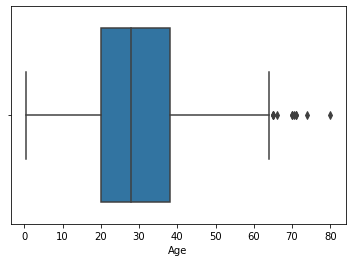

In [6]:
## To find an arbitrary value: 
sns.boxplot("Age",data=df)

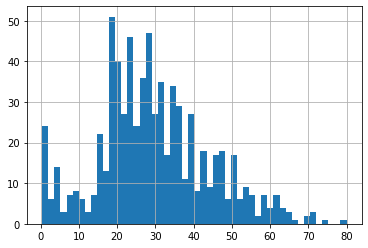

In [8]:
df.Age.hist(bins=50)

### Arbitrary value properties:

#### *We can use arbitrary values such as 0, 99, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).*
#### * The arbitrary value should be different from the mean or median and not within the normal values of the variable.*
    



In [10]:
## From the graphs we can see that we can use 99 as arbitrary value as it is no way near mean/median or any other distribution

In [11]:
def impute(df,variable):
    df[variable+"_99"]=df["Age"].fillna(99)

In [13]:
impute(df,"Age")

In [15]:
df.head(10)

,Survived,Age,Fare,Age_99
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,99.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [16]:
print(df.Age.std())
print(df.Age_99.std())

14.526497332334044
30.568607714277316


In [17]:
## Huge distortion in variance/co-variance,std,corr as all are interelated

In [18]:
## The main purpose of this imputation is to " capture the importance of missing values".

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

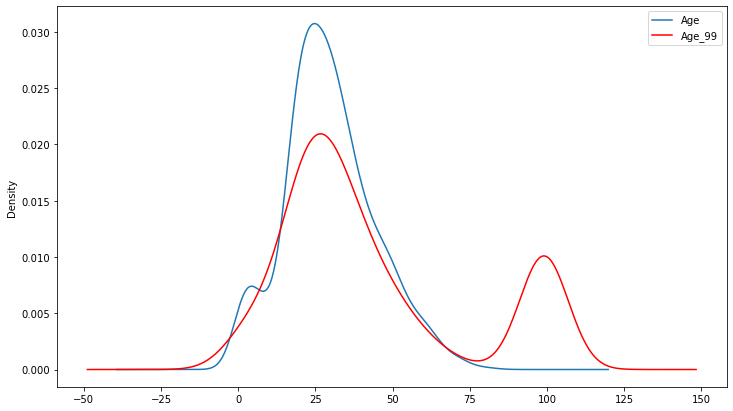

In [20]:
fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111)
df["Age"].plot(kind="kde",ax=ax)
df["Age_99"].plot(kind="kde",ax=ax,color="red")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

#### Assumptions: 
Data is not missing at random
#### Advantages: 
1. Quick and easy to implement
2. Bring out underlying importance of missing values
#### Disadvantages: 
1. Changes co-variance/variance
2. may create outliers
3. If missingness is not important, it may mask the predictive power of the original variable by distorting it's distribution

In [1]:
##---------------------------------------------------------------------##

# Handling of missing categorical values

## 1. Frequent Category/Mode Imputation

In [ ]:
import pandas as pd

In [3]:
df=pd.read_csv("loan.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
## Here there are around 43 categorical features but we will just consider few main categorical features and handle their missing values

In [3]:
df=pd.read_csv("loan.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
for col in df.columns:
    print(col+':'+ len(df.col.unique()))

AttributeError: 'DataFrame' object has no attribute 'col'

In [5]:
type(df.columns)

pandas.core.indexes.base.Index

In [6]:
for col in df.columns:
    print(col+':'+ len(df[col].unique()))

TypeError: can only concatenate str (not "int") to str

In [7]:
for col in df.columns:
    print(col,' : ', len(df[col].unique())," labels")

BsmtQual  :  5  labels
FireplaceQu  :  6  labels
GarageType  :  7  labels
SalePrice  :  663  labels


In [8]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [9]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
## Finding the most frequent categorical label

In [11]:
## 1st method
df.groupby(["BsmtQual"])["BsmtQual"].count().sort_values(ascending=True)

BsmtQual
Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [12]:
## 2nd method
df["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

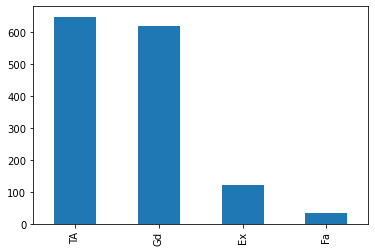

In [13]:
df["BsmtQual"].value_counts().plot.bar()

In [14]:
## Here as we can see, TA label is more frequently present

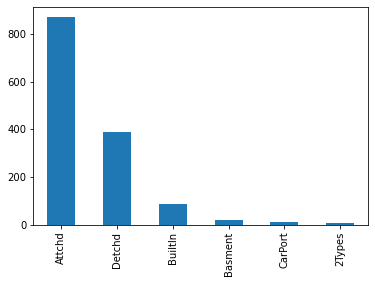

In [15]:
df["GarageType"].value_counts().plot.bar()

In [16]:
## Here as we can see, TA label is more frequently present

In [17]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [18]:
type(df.BsmtQual.value_counts())

pandas.core.series.Series

In [19]:
## we can access series by indexing []
df.BsmtQual.value_counts()[0]

649

In [20]:
df.BsmtQual.value_counts().index

Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object')

In [21]:
df.BsmtQual.value_counts().index[0]

'TA'

In [22]:
lst=df.BsmtQual.value_counts().index
lst[0]

'TA'

In [23]:
def impute_nan(df,variable):
    most_frequent=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent,inplace=True)

In [24]:
for i in ["BsmtQual","GarageType","FireplaceQu"]:
    impute_nan(df,i)

In [25]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [26]:
df.isnull().sum()  ## As we can see, all the missing values are handled.

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [27]:
## Mode can also be used to find the most frequent label

In [28]:
df["BsmtQual"].mode()

0    TA
dtype: object

In [29]:
def impute_nan(df,variable):
    most_frequent=df[variable].mode()
    df[variable].fillna(most_frequent,inplace=True)

In [30]:
for i in ["BsmtQual","GarageType","FireplaceQu"]:
    impute_nan(df,i)

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [32]:
df.isnull().sum() 

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### Advantages :
 1. Easy to implement
 2. fast
#### Disadvantage:

 1. since we are using the most frequent labels , it may use them in an over represented way, if there are many nans
 2. It distorts the relation of most frequent labels

In [33]:
##-----------------------------------------------------------------###


### 2) Adding a variable to capture nan

In [34]:
df=pd.read_csv("loan.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])
df.head()

<IPython.core.display.Javascript object>

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [35]:
import numpy as np

In [36]:
df["BsmtQual_nan"]=np.where(df["BsmtQual"].isnull(),1,0)

In [37]:
df.head(20)  

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


##### This adding of a variable, captures the importance of missing values 

In [43]:
df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [63]:
 df["BsmtQual"].mode()[0]

'TA'

In [44]:
## Here we are handling the missing values by replacing nan values by most frequent labels
## and also adding a nan column to capture the importance of missing values

In [73]:
## Handling all the features: 
df=pd.read_csv("loan.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

<IPython.core.display.Javascript object>

In [74]:
def add_nan(df,variable):
    frequent= df[variable].mode()[0]
    df[variable+"_nan"]=np.where(df[variable].isnull(),1,0)
    df[variable].fillna(frequent,inplace=True)
    

In [75]:
for i in df.columns:
    add_nan(df,i)
    

In [76]:
df.head(20)  ## we can drop salesprice for this computation as there are no missing values

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan,FireplaceQu_nan,GarageType_nan,SalePrice_nan
0,Gd,Gd,Attchd,208500,0,1,0,0
1,Gd,TA,Attchd,181500,0,0,0,0
2,Gd,TA,Attchd,223500,0,0,0,0
3,TA,Gd,Detchd,140000,0,0,0,0
4,Gd,TA,Attchd,250000,0,0,0,0
5,Gd,Gd,Attchd,143000,0,1,0,0
6,Ex,Gd,Attchd,307000,0,0,0,0
7,Gd,TA,Attchd,200000,0,0,0,0
8,TA,TA,Detchd,129900,0,0,0,0
9,TA,TA,Attchd,118000,0,0,0,0


In [65]:
for i in df.columns:
    print(i)

BsmtQual
FireplaceQu
GarageType
SalePrice


In [77]:
type(i)

str

##### This type of method increase the feature space and is mostly used for features with large NAN values(like FireplaceQu).  
#### Capturing the importance of missing values works well with features with large NAN values.

In [101]:
##---------------------------------------------------------------------###

## Another method or subpart of previous method is: Handling nan values as another categorical value


In this method , we replace nan values with a new category(say "Missing" or any name)

so basically , instead of taking most frequent category we just say that NaN is another category altogether.

### ***This the most common and used method for handling missing values of categorical features

In [78]:
df=pd.read_csv("loan.csv",usecols=["BsmtQual","FireplaceQu","GarageType","SalePrice"])

<IPython.core.display.Javascript object>

In [82]:
def impute_nan(df,variable):
    df[variable+"new"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [83]:
for i in df.columns:
    impute_nan(df,i)

In [84]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnew,FireplaceQunew,GarageTypenew,SalePricenew
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [86]:
df.drop(["BsmtQual","GarageType","FireplaceQu","SalePrice"])

KeyError: "['BsmtQual' 'GarageType' 'FireplaceQu' 'SalePrice'] not found in axis"

In [92]:
df.drop(["BsmtQual","GarageType","FireplaceQu","SalePrice"],axis=1,inplace=True)

In [93]:
## Here we have new data set, with no Nan(null) values and a new categorical label "Missing" which represents nan values

In [96]:
df.isnull().sum()

BsmtQualnew       0
FireplaceQunew    0
GarageTypenew     0
SalePricenew      0
dtype: int64

In [98]:
df.BsmtQualnew.value_counts()   ## Missing-37

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQualnew, dtype: int64

In [99]:
## All the nan values are handled and the " Missing" label is treated as a new categorical value.

In [100]:
### This the most common and used method for handling missing values of categorical feature

#### Sometimes the "most frequent categorical imputation" does not work well, as it distorts the distribution and there is a influx of the most frequent value in dataset.
#### So this method can be use instead of that as it has less disadvantages and works well in most of the cases